In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import graphviz 

%matplotlib inline

# Loading data set

In [2]:
raw_data = pd.read_csv('train_data.csv')
raw_data

,ID,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,Remarkable_Day,Month,Operating_Systems,Browser,Province,TrafficType,VisitorType,Weekend,Income
0,1,0.0,0.0,1.0,10.0,9.0,700.000000,0.000000,0.011111,29.621890,0.0,Dec,Android,2,9,10,Returning_Visitor,no,1
1,2,0.0,0.0,2.0,15.0,10.0,894.666667,0.000000,0.022222,0.000000,0.0,May,Android,4,4,2,Returning_Visitor,no,0
2,3,0.0,0.0,1.0,85.0,14.0,306.500000,0.000000,0.004444,0.000000,0.0,Mar,Android,2,3,2,Returning_Visitor,no,0
3,4,0.0,0.0,5.0,175.1,26.0,615.559524,0.000000,0.002083,62.773672,0.0,Sep,Windows,1,1,3,New_Visitor,1,1
4,5,0.0,0.0,2.0,25.0,5.0,40.000000,0.066667,0.083333,0.000000,0.6,May,Android,2,1,1,Returning_Visitor,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,9939,0.0,0.0,0.0,0.0,8.0,376.333333,0.000000,0.028571,53.988000,0.0,May,Android,2,2,4,Returning_Visitor,1,1
9939,9940,1.0,46.5,1.0,0.0,22.0,671.866667,0.017391,0.020580,0.000000,0.0,Nov,iOS,2,7,10,Returning_Visitor,no,0
9940,9941,0.0,0.0,0.0,0.0,15.0,872.833333,0.000000,0.026667,0.000000,0.0,Mar,Android,2,2,3,Returning_Visitor,1,0
9941,9942,0.0,0.0,2.0,327.5,7.0,570.500000,0.000000,0.028571,0.000000,0.0,Nov,Android,2,2,2,Returning_Visitor,no,0


# Data Preprocessing

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9943 entries, 0 to 9942
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      9943 non-null   int64  
 1   Aboutus                 9928 non-null   float64
 2   Aboutus_Duration        9928 non-null   float64
 3   Item_page               9928 non-null   float64
 4   Item_page_Duration      9928 non-null   float64
 5   Checkout_page           9928 non-null   float64
 6   Checkout_page_Duration  9928 non-null   float64
 7   Bounce_Rates            9928 non-null   float64
 8   Exit_Rates              9928 non-null   float64
 9   Page_Values             9943 non-null   float64
 10  Remarkable_Day          9943 non-null   float64
 11  Month                   9943 non-null   object 
 12  Operating_Systems       9943 non-null   object 
 13  Browser                 9943 non-null   int64  
 14  Province                9943 non-null   

In [4]:
raw_data.isnull().sum()

ID                         0
Aboutus                   15
Aboutus_Duration          15
Item_page                 15
Item_page_Duration        15
Checkout_page             15
Checkout_page_Duration    15
Bounce_Rates              15
Exit_Rates                15
Page_Values                0
Remarkable_Day             0
Month                      0
Operating_Systems          0
Browser                    0
Province                   0
TrafficType                0
VisitorType                0
Weekend                    0
Income                     0
dtype: int64

In [5]:
raw_data = raw_data.dropna()
raw_data.isnull().sum()

ID                        0
Aboutus                   0
Aboutus_Duration          0
Item_page                 0
Item_page_Duration        0
Checkout_page             0
Checkout_page_Duration    0
Bounce_Rates              0
Exit_Rates                0
Page_Values               0
Remarkable_Day            0
Month                     0
Operating_Systems         0
Browser                   0
Province                  0
TrafficType               0
VisitorType               0
Weekend                   0
Income                    0
dtype: int64

In [6]:
raw_data.shape

(9928, 19)

In [7]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 30:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature ID :9928
The number of values for feature Aboutus :17 -- [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 16. 24.]
The number of values for feature Aboutus_Duration :1067
The number of values for feature Item_page :27 -- [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 26. 27.]
The number of values for feature Item_page_Duration :2822
The number of values for feature Checkout_page :292
The number of values for feature Checkout_page_Duration :7830
The number of values for feature Bounce_Rates :1607
The number of values for feature Exit_Rates :3989
The number of values for feature Page_Values :2169
The number of values for feature Remarkable_Day :6 -- [0.  0.2 0.4 0.6 0.8 1. ]
The number of values for feature Month :10 -- ['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
The number of values for feature Operating_Systems :8 -- ['Android' 'CentOS' 'Fedora' 'Ubuntu' 'Windows' 'iOS

In [8]:
raw_data.columns

Index(['ID', 'Aboutus', 'Aboutus_Duration', 'Item_page', 'Item_page_Duration',
       'Checkout_page', 'Checkout_page_Duration', 'Bounce_Rates', 'Exit_Rates',
       'Page_Values', 'Remarkable_Day', 'Month', 'Operating_Systems',
       'Browser', 'Province', 'TrafficType', 'VisitorType', 'Weekend',
       'Income'],
      dtype='object')

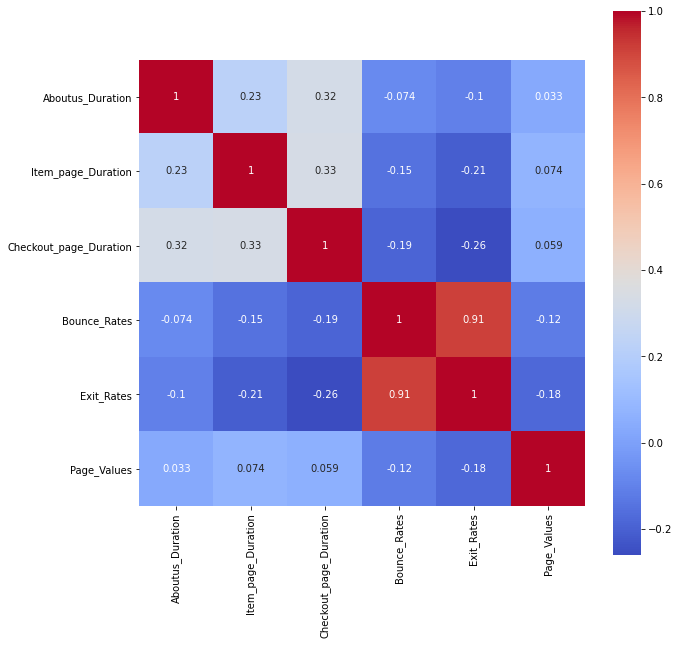

In [9]:
float_col = raw_data[['Aboutus_Duration','Item_page_Duration', 
                    'Checkout_page_Duration', 'Bounce_Rates', 'Exit_Rates','Page_Values']]

plt.figure(figsize=(10,10))
sns.heatmap(float_col.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

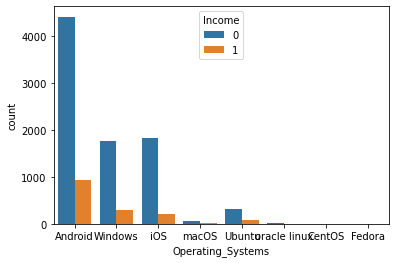

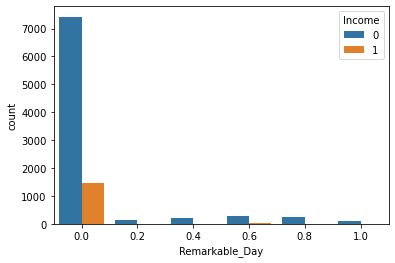

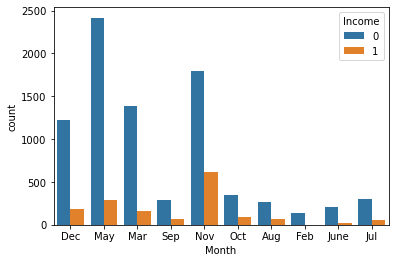

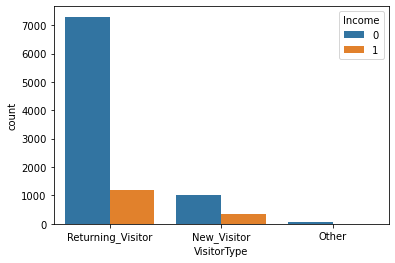

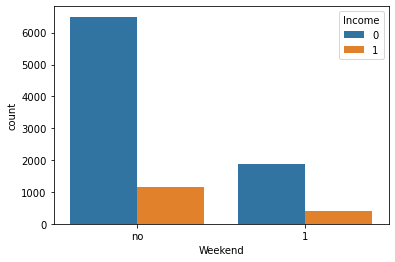

In [10]:
cat_columns = ['Operating_Systems','Remarkable_Day','Month','VisitorType','Weekend']

for col in cat_columns:
    plt.figure()
    ax = sns.countplot(x=col, data=raw_data, hue='Income')

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

raw_data['Operating_Systems'] = le.fit_transform(raw_data['Operating_Systems'])
raw_data['Remarkable_Day'] = le.fit_transform(raw_data['Remarkable_Day'])
raw_data['Month'] = le.fit_transform(raw_data['Month'])
raw_data['VisitorType'] = le.fit_transform(raw_data['VisitorType'])
raw_data['Weekend'] = le.fit_transform(raw_data['Weekend'])

raw_data

<ipython-input-11-5fe9a7cb1b96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Operating_Systems'] = le.fit_transform(raw_data['Operating_Systems'])
<ipython-input-11-5fe9a7cb1b96>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Remarkable_Day'] = le.fit_transform(raw_data['Remarkable_Day'])
<ipython-input-11-5fe9a7cb1b96>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,ID,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,Remarkable_Day,Month,Operating_Systems,Browser,Province,TrafficType,VisitorType,Weekend,Income
0,1,0.0,0.0,1.0,10.0,9.0,700.000000,0.000000,0.011111,29.621890,0,1,0,2,9,10,2,1,1
1,2,0.0,0.0,2.0,15.0,10.0,894.666667,0.000000,0.022222,0.000000,0,6,0,4,4,2,2,1,0
2,3,0.0,0.0,1.0,85.0,14.0,306.500000,0.000000,0.004444,0.000000,0,5,0,2,3,2,2,1,0
3,4,0.0,0.0,5.0,175.1,26.0,615.559524,0.000000,0.002083,62.773672,0,9,4,1,1,3,0,0,1
4,5,0.0,0.0,2.0,25.0,5.0,40.000000,0.066667,0.083333,0.000000,3,6,0,2,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,9939,0.0,0.0,0.0,0.0,8.0,376.333333,0.000000,0.028571,53.988000,0,6,0,2,2,4,2,0,1
9939,9940,1.0,46.5,1.0,0.0,22.0,671.866667,0.017391,0.020580,0.000000,0,7,5,2,7,10,2,1,0
9940,9941,0.0,0.0,0.0,0.0,15.0,872.833333,0.000000,0.026667,0.000000,0,5,0,2,2,3,2,0,0
9941,9942,0.0,0.0,2.0,327.5,7.0,570.500000,0.000000,0.028571,0.000000,0,7,0,2,2,2,2,1,0


In [12]:
# raw_data2 = pd.get_dummies(raw_data2, columns=['Remarkable_Day','Month','VisitorType','Weekend'])
# raw_data2

In [13]:
raw_data.columns

Index(['ID', 'Aboutus', 'Aboutus_Duration', 'Item_page', 'Item_page_Duration',
       'Checkout_page', 'Checkout_page_Duration', 'Bounce_Rates', 'Exit_Rates',
       'Page_Values', 'Remarkable_Day', 'Month', 'Operating_Systems',
       'Browser', 'Province', 'TrafficType', 'VisitorType', 'Weekend',
       'Income'],
      dtype='object')

In [14]:
raw_data2 = raw_data[['Aboutus', 'Aboutus_Duration', 'Item_page', 'Item_page_Duration',
       'Checkout_page', 'Checkout_page_Duration', 'Bounce_Rates',
       'Page_Values', 'Remarkable_Day', 'Month', 'Operating_Systems',
       'Browser', 'Province', 'TrafficType', 'VisitorType', 'Weekend',
       'Income']]

raw_data2

,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Page_Values,Remarkable_Day,Month,Operating_Systems,Browser,Province,TrafficType,VisitorType,Weekend,Income
0,0.0,0.0,1.0,10.0,9.0,700.000000,0.000000,29.621890,0,1,0,2,9,10,2,1,1
1,0.0,0.0,2.0,15.0,10.0,894.666667,0.000000,0.000000,0,6,0,4,4,2,2,1,0
2,0.0,0.0,1.0,85.0,14.0,306.500000,0.000000,0.000000,0,5,0,2,3,2,2,1,0
3,0.0,0.0,5.0,175.1,26.0,615.559524,0.000000,62.773672,0,9,4,1,1,3,0,0,1
4,0.0,0.0,2.0,25.0,5.0,40.000000,0.066667,0.000000,3,6,0,2,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,0.0,0.0,0.0,0.0,8.0,376.333333,0.000000,53.988000,0,6,0,2,2,4,2,0,1
9939,1.0,46.5,1.0,0.0,22.0,671.866667,0.017391,0.000000,0,7,5,2,7,10,2,1,0
9940,0.0,0.0,0.0,0.0,15.0,872.833333,0.000000,0.000000,0,5,0,2,2,3,2,0,0
9941,0.0,0.0,2.0,327.5,7.0,570.500000,0.000000,0.000000,0,7,0,2,2,2,2,1,0


In [15]:
# Scaling our columns
# normalizing some variables 
scale_vars = ['Checkout_page','Aboutus_Duration','Item_page_Duration','Checkout_page_Duration','Page_Values','Bounce_Rates']

scaler = MinMaxScaler()
raw_data2[scale_vars] = scaler.fit_transform(raw_data2[scale_vars])
raw_data2

<ipython-input-15-a88ffb77cfd3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data2[scale_vars] = scaler.fit_transform(raw_data2[scale_vars])
C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Page_Values,Remarkable_Day,Month,Operating_Systems,Browser,Province,TrafficType,VisitorType,Weekend,Income
0,0.0,0.000443,1.0,0.004138,0.012766,0.016237,0.000000,0.082066,0,1,0,2,9,10,2,1,1
1,0.0,0.000443,2.0,0.006019,0.014184,0.020746,0.000000,0.000000,0,6,0,4,4,2,2,1,0
2,0.0,0.000443,1.0,0.032351,0.019858,0.007123,0.000000,0.000000,0,5,0,2,3,2,2,1,0
3,0.0,0.000443,5.0,0.066245,0.036879,0.014281,0.000000,0.173911,0,9,4,1,1,3,0,0,1
4,0.0,0.000443,2.0,0.009781,0.007092,0.000950,0.333333,0.000000,3,6,0,2,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,0.0,0.000443,0.0,0.000376,0.011348,0.008740,0.000000,0.149571,0,6,0,2,2,4,2,0,1
9939,1.0,0.021037,1.0,0.000376,0.031206,0.015586,0.086957,0.000000,0,7,5,2,7,10,2,1,0
9940,0.0,0.000443,0.0,0.000376,0.021277,0.020241,0.000000,0.000000,0,5,0,2,2,3,2,0,0
9941,0.0,0.000443,2.0,0.123574,0.009929,0.013238,0.000000,0.000000,0,7,0,2,2,2,2,1,0


# Splitting

In [24]:
# Your code goes here
X = raw_data2.drop('Income', axis=1).values# Input features (attributes)
y = raw_data2['Income'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

X shape: (9928, 16)
y shape: (9928,)


# Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

In [25]:
#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [19]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Training Accuracy is:  0.8376630261902237
Testing Accuracy is:  0.8490945674044266
Confusion Matrix for Testing: 
 [[373  44]
 [ 31  49]]


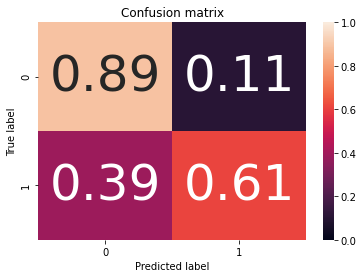

In [26]:
# Accuracy on Test
print("Training Accuracy is: ", gnb.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", gnb.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=gnb.classes_)

print('Confusion Matrix for Testing: \n' ,cm)

# Unseen dataset

In [27]:
testing_dataset = pd.read_csv('test_data.csv')
testing_dataset

,ID,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,Remarkable_Day,Month,Operating_Systems,Browser,Province,TrafficType,VisitorType,Weekend
0,1,0,0.0,12,569.825000,127,6065.016218,0.006716,0.009265,0.152167,0.0,Aug,Windows,1,2,4,Returning_Visitor,no
1,2,0,0.0,0,0.000000,25,770.028571,0.011200,0.034933,0.000000,0.0,Mar,iOS,2,8,10,Returning_Visitor,no
2,3,0,0.0,7,38.600000,70,1087.700000,0.000000,0.004861,0.000000,0.0,Oct,Android,2,4,5,Returning_Visitor,no
3,4,0,0.0,4,105.266667,35,655.684762,0.000000,0.005128,0.000000,0.0,Nov,Android,10,7,2,New_Visitor,1
4,5,0,0.0,0,0.000000,3,63.000000,0.000000,0.066667,0.000000,0.8,May,Windows,1,9,1,Returning_Visitor,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,0.0,0,0.000000,2,4.000000,0.000000,0.100000,0.000000,0.8,May,Android,5,4,1,Returning_Visitor,no
996,997,0,0.0,1,43.000000,36,2362.500000,0.000000,0.016190,0.000000,0.6,May,Android,5,1,4,Returning_Visitor,no
997,998,0,0.0,0,0.000000,25,1017.966667,0.008333,0.017361,0.000000,0.0,Aug,iOS,2,4,1,Returning_Visitor,1
998,999,0,0.0,0,0.000000,18,587.733333,0.000000,0.022222,32.523808,0.0,Nov,Android,2,7,4,Returning_Visitor,1


In [21]:
testing_dataset.shape

(1000, 18)

In [22]:
# Investigate all the elements whithin each Feature 

for column in testing_dataset:
    unique_vals = np.unique(testing_dataset[column])
    nr_values = len(unique_vals)
    if nr_values < 30:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature ID :1000
The number of values for feature Aboutus :11 -- [ 0  1  2  3  4  5  6  7  8  9 11]
The number of values for feature Aboutus_Duration :148
The number of values for feature Item_page :19 -- [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 24]
The number of values for feature Item_page_Duration :422
The number of values for feature Checkout_page :124
The number of values for feature Checkout_page_Duration :891
The number of values for feature Bounce_Rates :283
The number of values for feature Exit_Rates :545
The number of values for feature Page_Values :236
The number of values for feature Remarkable_Day :6 -- [0.  0.2 0.4 0.6 0.8 1. ]
The number of values for feature Month :10 -- ['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
The number of values for feature Operating_Systems :6 -- ['Android' 'Ubuntu' 'Windows' 'iOS' 'macOS' 'oracle linux']
The number of values for feature Browser :11 -- [ 1  2  3  4  5  6  7  8 10 12 13]
Th

In [23]:
testing_dataset = pd.get_dummies(testing_dataset, columns=['Month','VisitorType','Weekend'])
testing_dataset

,ID,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_1,Weekend_no
0,1,0,0.0,12,569.825000,127,6065.016218,0.006716,0.009265,0.152167,...,0,0,0,0,0,0,0,1,0,1
1,2,0,0.0,0,0.000000,25,770.028571,0.011200,0.034933,0.000000,...,1,0,0,0,0,0,0,1,0,1
2,3,0,0.0,7,38.600000,70,1087.700000,0.000000,0.004861,0.000000,...,0,0,0,1,0,0,0,1,0,1
3,4,0,0.0,4,105.266667,35,655.684762,0.000000,0.005128,0.000000,...,0,0,1,0,0,1,0,0,1,0
4,5,0,0.0,0,0.000000,3,63.000000,0.000000,0.066667,0.000000,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,0.0,0,0.000000,2,4.000000,0.000000,0.100000,0.000000,...,0,1,0,0,0,0,0,1,0,1
996,997,0,0.0,1,43.000000,36,2362.500000,0.000000,0.016190,0.000000,...,0,1,0,0,0,0,0,1,0,1
997,998,0,0.0,0,0.000000,25,1017.966667,0.008333,0.017361,0.000000,...,0,0,0,0,0,0,0,1,1,0
998,999,0,0.0,0,0.000000,18,587.733333,0.000000,0.022222,32.523808,...,0,0,1,0,0,0,0,1,1,0


In [24]:
testing_dataset.columns

Index(['ID', 'Aboutus', 'Aboutus_Duration', 'Item_page', 'Item_page_Duration',
       'Checkout_page', 'Checkout_page_Duration', 'Bounce_Rates', 'Exit_Rates',
       'Page_Values', 'Remarkable_Day', 'Operating_Systems', 'Browser',
       'Province', 'TrafficType', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor',
       'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_1',
       'Weekend_no'],
      dtype='object')

In [25]:
new_testing_dataset = testing_dataset[['Aboutus', 'Aboutus_Duration', 'Item_page', 'Item_page_Duration',
       'Checkout_page', 'Checkout_page_Duration', 'Bounce_Rates', 'Exit_Rates',
       'Page_Values', 'Remarkable_Day', 'TrafficType', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor',
       'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_1',
       'Weekend_no']]

new_testing_dataset

,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,Remarkable_Day,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_1,Weekend_no
0,0,0.0,12,569.825000,127,6065.016218,0.006716,0.009265,0.152167,0.0,...,0,0,0,0,0,0,0,1,0,1
1,0,0.0,0,0.000000,25,770.028571,0.011200,0.034933,0.000000,0.0,...,1,0,0,0,0,0,0,1,0,1
2,0,0.0,7,38.600000,70,1087.700000,0.000000,0.004861,0.000000,0.0,...,0,0,0,1,0,0,0,1,0,1
3,0,0.0,4,105.266667,35,655.684762,0.000000,0.005128,0.000000,0.0,...,0,0,1,0,0,1,0,0,1,0
4,0,0.0,0,0.000000,3,63.000000,0.000000,0.066667,0.000000,0.8,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0.0,0,0.000000,2,4.000000,0.000000,0.100000,0.000000,0.8,...,0,1,0,0,0,0,0,1,0,1
996,0,0.0,1,43.000000,36,2362.500000,0.000000,0.016190,0.000000,0.6,...,0,1,0,0,0,0,0,1,0,1
997,0,0.0,0,0.000000,25,1017.966667,0.008333,0.017361,0.000000,0.0,...,0,0,0,0,0,0,0,1,1,0
998,0,0.0,0,0.000000,18,587.733333,0.000000,0.022222,32.523808,0.0,...,0,0,1,0,0,0,0,1,1,0


In [26]:
# Scaling our columns
# normalizing some variables 
scale_vars = ['Item_page_Duration','Checkout_page_Duration','Bounce_Rates', 'Exit_Rates','Page_Values']

scaler = MinMaxScaler()
new_testing_dataset[scale_vars] = scaler.fit_transform(new_testing_dataset[scale_vars])
new_testing_dataset

<ipython-input-26-982aed2d1dba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_testing_dataset[scale_vars] = scaler.fit_transform(new_testing_dataset[scale_vars])
C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,Remarkable_Day,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_1,Weekend_no
0,0,0.0,12,0.415296,127,0.438186,0.033582,0.046325,0.000421,0.0,...,0,0,0,0,0,0,0,1,0,1
1,0,0.0,0,0.000728,25,0.055696,0.056000,0.174667,0.000000,0.0,...,1,0,0,0,0,0,0,1,0,1
2,0,0.0,7,0.028810,70,0.078644,0.000000,0.024306,0.000000,0.0,...,0,0,0,1,0,0,0,1,0,1
3,0,0.0,4,0.077313,35,0.047436,0.000000,0.025641,0.000000,0.0,...,0,0,1,0,0,1,0,0,1,0
4,0,0.0,0,0.000728,3,0.004623,0.000000,0.333333,0.000000,0.8,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0.0,0,0.000728,2,0.000361,0.000000,0.500000,0.000000,0.8,...,0,1,0,0,0,0,0,1,0,1
996,0,0.0,1,0.032012,36,0.170730,0.000000,0.080952,0.000000,0.6,...,0,1,0,0,0,0,0,1,0,1
997,0,0.0,0,0.000728,25,0.073606,0.041667,0.086806,0.000000,0.0,...,0,0,0,0,0,0,0,1,1,0
998,0,0.0,0,0.000728,18,0.042528,0.000000,0.111111,0.089903,0.0,...,0,0,1,0,0,0,0,1,1,0


In [27]:
X_new = new_testing_dataset.values
X_new.shape

(1000, 26)

In [28]:
pred_xgboost = rf.predict(X_new)

pred_xgboost

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [35]:
pred_prob_xgboost

array([[0.77754164, 0.22245838],
       [0.9851019 , 0.01489812],
       [0.94214064, 0.05785935],
       ...,
       [0.9578848 , 0.04211523],
       [0.20746356, 0.79253644],
       [0.9647921 , 0.03520791]], dtype=float32)

In [36]:
# function to select second column for probabilities
def column(matrix, i):
    return [row[i] for row in matrix]

column(pred_prob_xgboost, 1)

[0.22245838,
 0.014898124,
 0.05785935,
 0.16714546,
 0.0086091515,
 0.039809693,
 0.043461327,
 0.020857682,
 0.044718273,
 0.004867304,
 0.048016433,
 0.018004972,
 0.01914891,
 0.017627396,
 0.14797169,
 0.6853867,
 0.06392876,
 0.008124187,
 0.79253644,
 0.035207912,
 0.04624253,
 0.06793509,
 0.004587192,
 0.036414742,
 0.008946495,
 0.049588487,
 0.102113165,
 0.026711242,
 0.16429801,
 0.6706395,
 0.24065465,
 0.89669013,
 0.025744671,
 0.03984348,
 0.01757592,
 0.05719802,
 0.7723926,
 0.025933804,
 0.23091452,
 0.023698876,
 0.07724926,
 0.19510874,
 0.03860586,
 0.016432093,
 0.03683054,
 0.021162117,
 0.0078061665,
 0.010821112,
 0.06727004,
 0.47098753,
 0.012530245,
 0.014537998,
 0.025129464,
 0.11962772,
 0.29939502,
 0.016895268,
 0.068490535,
 0.5383322,
 0.018077431,
 0.01264568,
 0.50813717,
 0.008576431,
 0.09973374,
 0.14285742,
 0.014792432,
 0.025790967,
 0.13643333,
 0.030184262,
 0.32883462,
 0.0072357506,
 0.083721966,
 0.08582971,
 0.10340323,
 0.011279413,
 

In [30]:
output = testing_dataset.copy()
output['Predictions - Income or Not'] = pred_xgboost
output['Income'] = 'Empty'
output['Income'][output['Predictions - Income or Not'] == 0] = 0
output['Income'][output['Predictions - Income or Not'] == 1] = 1
output.head()

<ipython-input-30-006455f0f59d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Income'][output['Predictions - Income or Not'] == 0] = 0
<ipython-input-30-006455f0f59d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Income'][output['Predictions - Income or Not'] == 1] = 1


,ID,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,...,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_1,Weekend_no,Predictions - Income or Not,Income
0,1,0,0.0,12,569.825000,127,6065.016218,0.006716,0.009265,0.152167,...,0,0,0,0,0,1,0,1,0,0
1,2,0,0.0,0,0.000000,25,770.028571,0.011200,0.034933,0.000000,...,0,0,0,0,0,1,0,1,0,0
2,3,0,0.0,7,38.600000,70,1087.700000,0.000000,0.004861,0.000000,...,0,1,0,0,0,1,0,1,0,0
3,4,0,0.0,4,105.266667,35,655.684762,0.000000,0.005128,0.000000,...,1,0,0,1,0,0,1,0,0,0
4,5,0,0.0,0,0.000000,3,63.000000,0.000000,0.066667,0.000000,...,0,0,0,0,0,1,0,1,0,0


In [31]:
final_output = output[['ID', 'Income']]
final_output

,ID,Income
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
995,996,0
996,997,0
997,998,0
998,999,1


In [32]:
import os

final_output.to_csv('8.50am .csv', sep=',')

os. getcwd() 

'C:\\Users\\Raisul Zulfikar\\Desktop\\Data Rush1.0'